In [1]:
from read_datasets import read_data 
from read_datasets import DATA_PATH,  ICMC_PATH, ORIGNAL_PATH

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)

from skimage.feature import hog

In [2]:
# Read data
icmc_x, icmc_y = read_data(DATA_PATH + ICMC_PATH, size=(20, 1, 300, 200))
original_x, original_y = read_data(DATA_PATH + ORIGNAL_PATH,
                            size=(20, 10, 112,  92))

In [3]:
def apply_hog(imgs, testing=False):
    """ Applys HOG (Histogram of oriented gradients) to array of images
    
    Parameters
    ----------
    imgs :  numpy.array 
            Contains the images
    
    testing : boolean
            Weather or not to use less data (for testing purposes)
            Also return a tuple, with the second element being the visualization 
                of the image
    """
    if testing:
        visualize = True
        imgs = imgs[:1]
    else:
        visualize = False
    
    new_imgs = []
    for img in imgs:
        new_imgs.append(hog(img, visualize=visualize, feature_vector=True))
        
    return np.array(new_imgs)

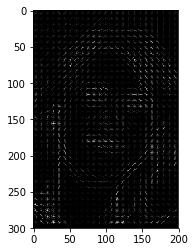

Size of a feature vector: (65205,)


In [6]:
if __name__ == "__main__":
    img, show_img = apply_hog(icmc_x, testing=True)[0]
    plt.imshow(show_img, cmap=plt.cm.gray)
    plt.show()
    
    print("Size of a feature vector:", img.shape)